# Preprocessing

In [9]:
# Script to preprocess physiological recordings from fMRI experiment

#dependencies
import biosppy as bio
import numpy as np
import pandas as pd
import neurokit as nk
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.gridspec as gridspec


#specify directory
dir_path = 'C:\\Users\\sangfrois\\Desktop\\Neuromod_tests\\'
subject_path = 'mockExperiment\\'
exp_path = 'ses-video001\\'

#read data
Biosignals_dataFrame, sampling_rate = nk.read_acqknowledge(dir_path+subject_path+'biopac_test_2019-07-03_sub3_sangfrois.acq', return_sampling_rate=True)
Fs=sampling_rate

#print sampling frequency
print(Fs)

Populating the interactive namespace from numpy and matplotlib
10000.0


In [11]:

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (40.0, 30.0)  # Make figures a bit bigger

Populating the interactive namespace from numpy and matplotlib


In [63]:
Biosignals_dataFrame['TTL'].describe()

count    1.877726e+07
mean    -3.603942e-04
std      4.980837e-02
min     -3.051758e-03
25%     -9.155273e-04
50%     -9.155273e-04
75%     -6.103516e-04
max      4.994507e+00
Name: TTL, dtype: float64

In [13]:
# intialize variables, i.e : name the signals
ppg = Biosignals_dataFrame['PPG100C']
ecg = Biosignals_dataFrame['ECG100C']
rsp = Biosignals_dataFrame['Custom, HLT100C - A 6']
ttl = Biosignals_dataFrame['TTL']

In [3]:
from biosppy import tools

In [14]:
ecg=ecg[13000000:]
ttl=ttl[13000000:]
rsp=rsp[13000000:]

C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


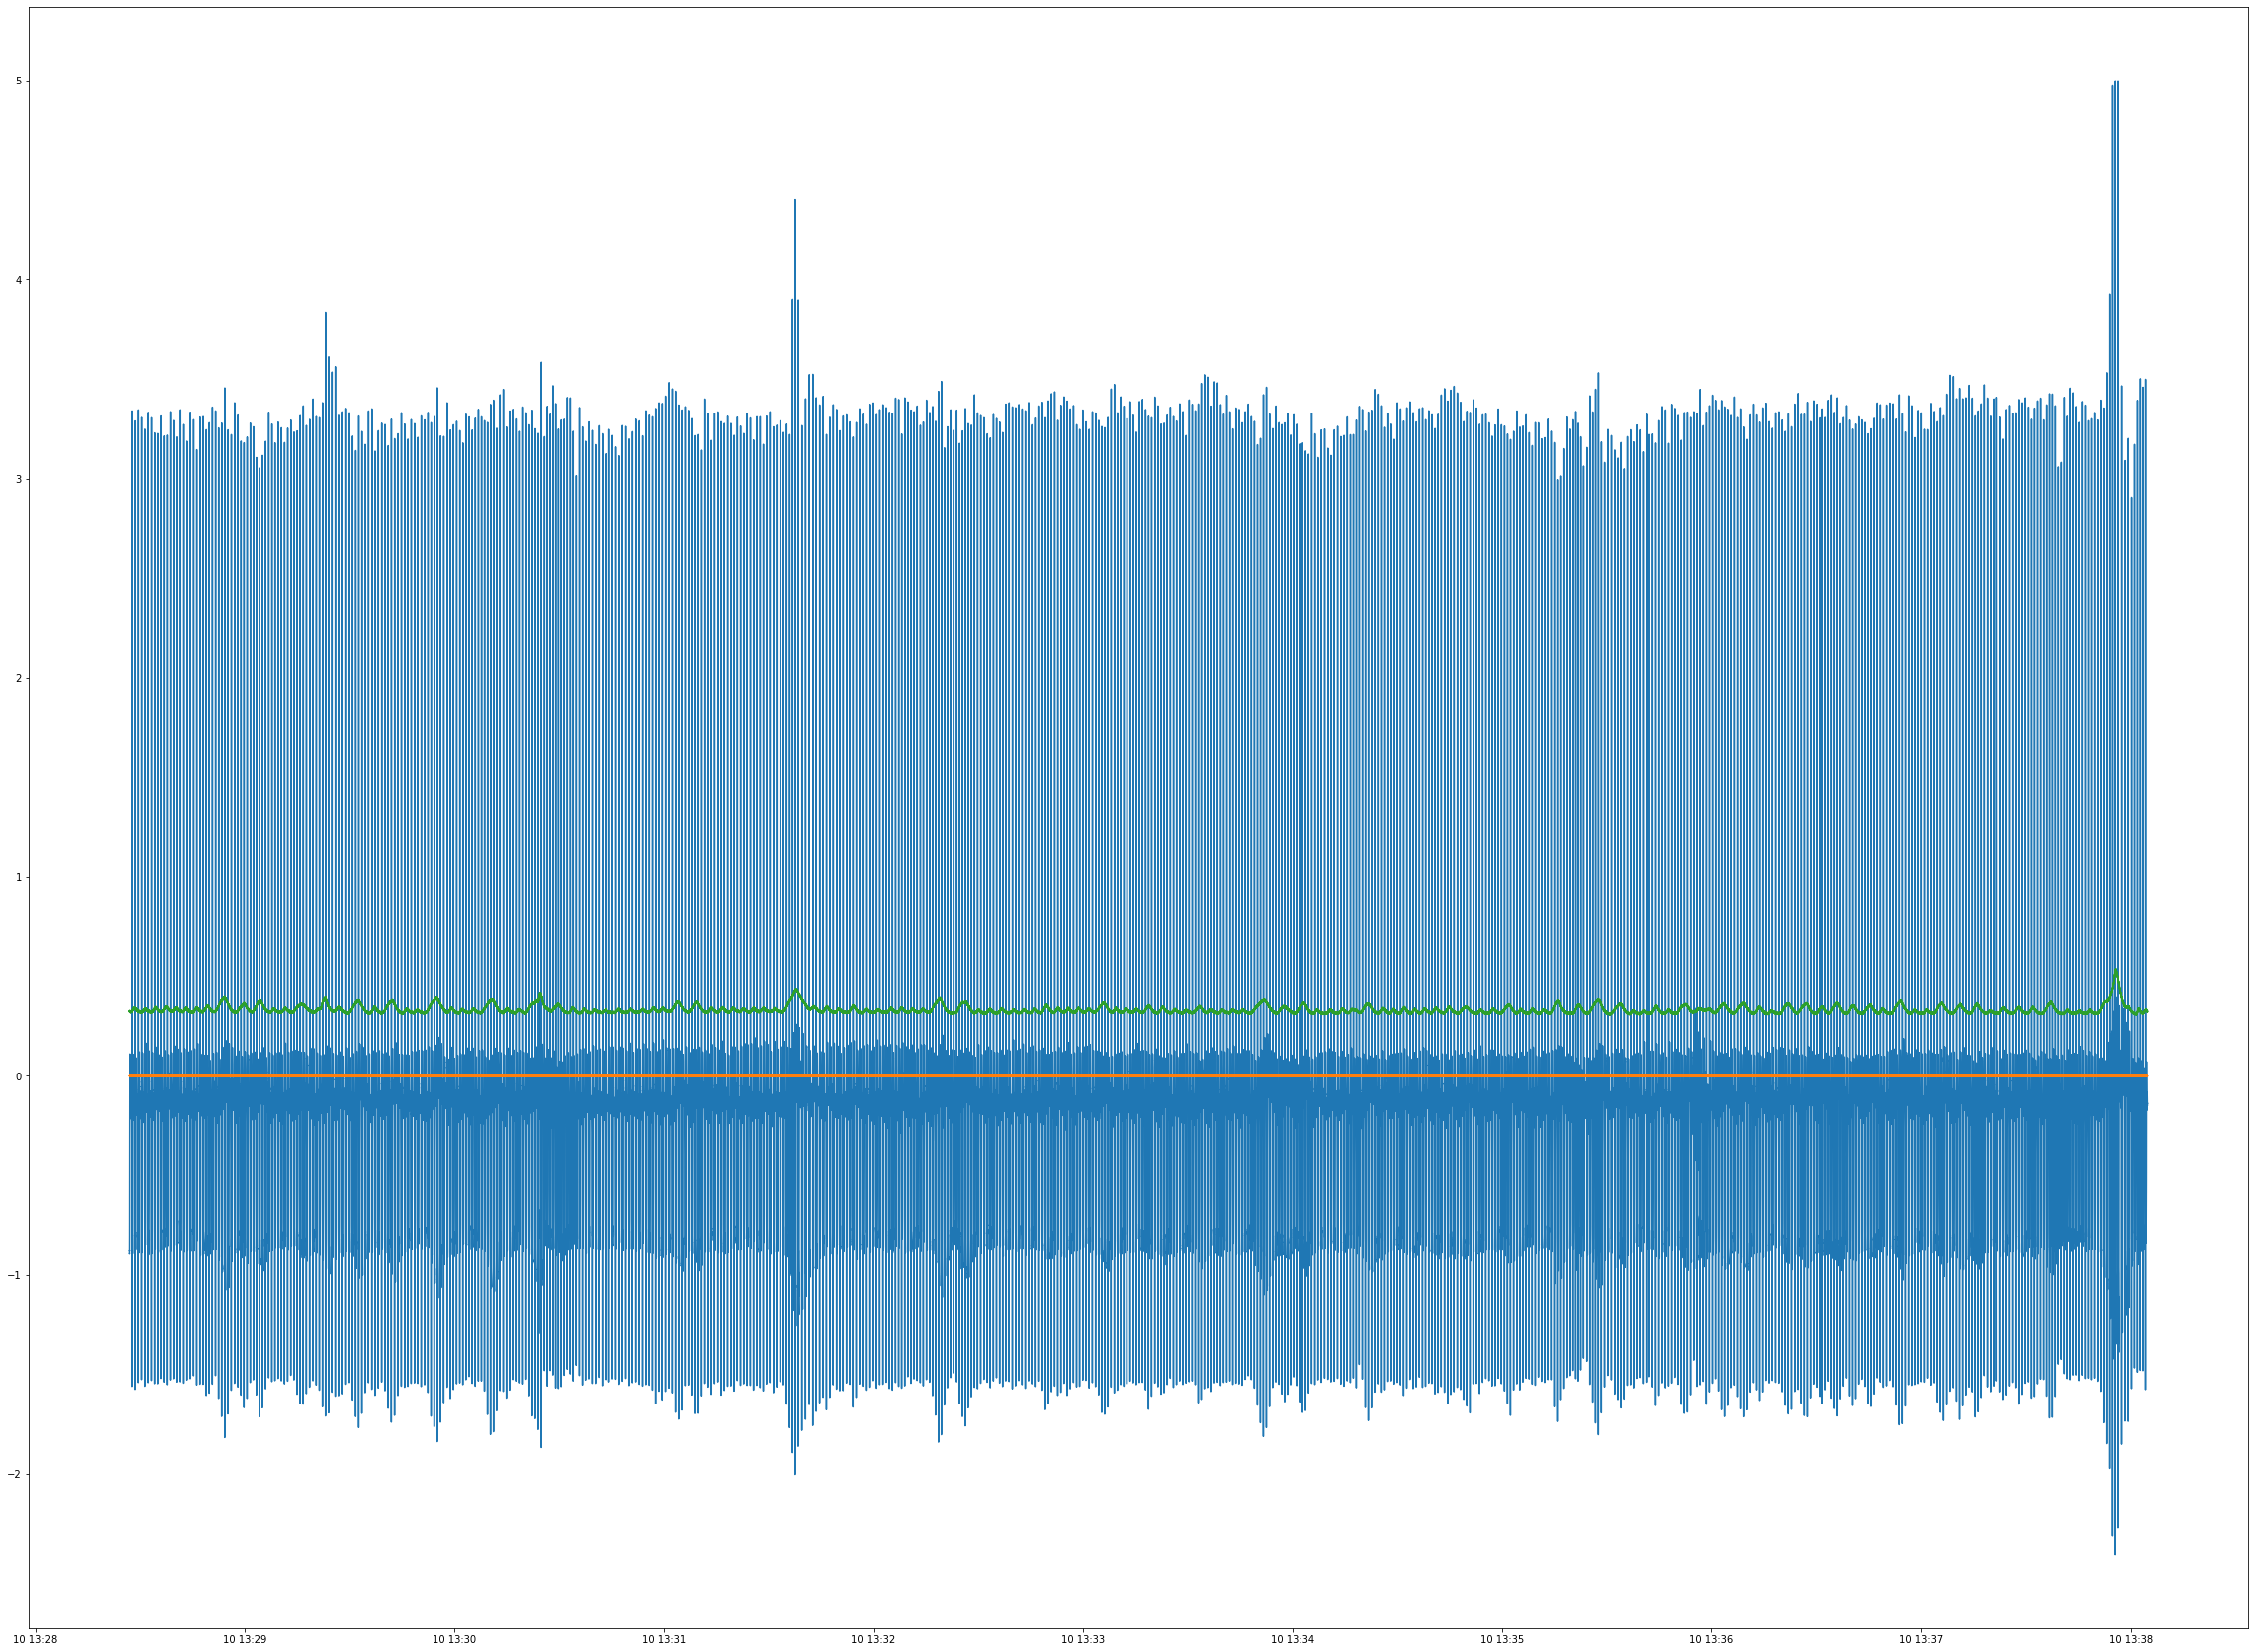

In [15]:
plt.plot(ecg)
plt.plot(ttl)
plt.plot(rsp)

In [17]:
preprocessedECG = nk.bio.ecg_preprocess(ecg, sampling_rate=10000, filter_type="FIR", filter_band="bandpass", filter_frequency=[3, 45], filter_order=0.3, segmenter="pekkanen")

Note : Specify the processing to TTL segments 
    - Possibly: build template 

In [39]:
preprocECG_df=preprocessedECG['df']
ecg_raw = preprocECG_df['ECG_Raw']
ecg_filtered = preprocECG_df['ECG_Filtered']
r_peaks = preprocECG_df['ECG_R_Peaks']

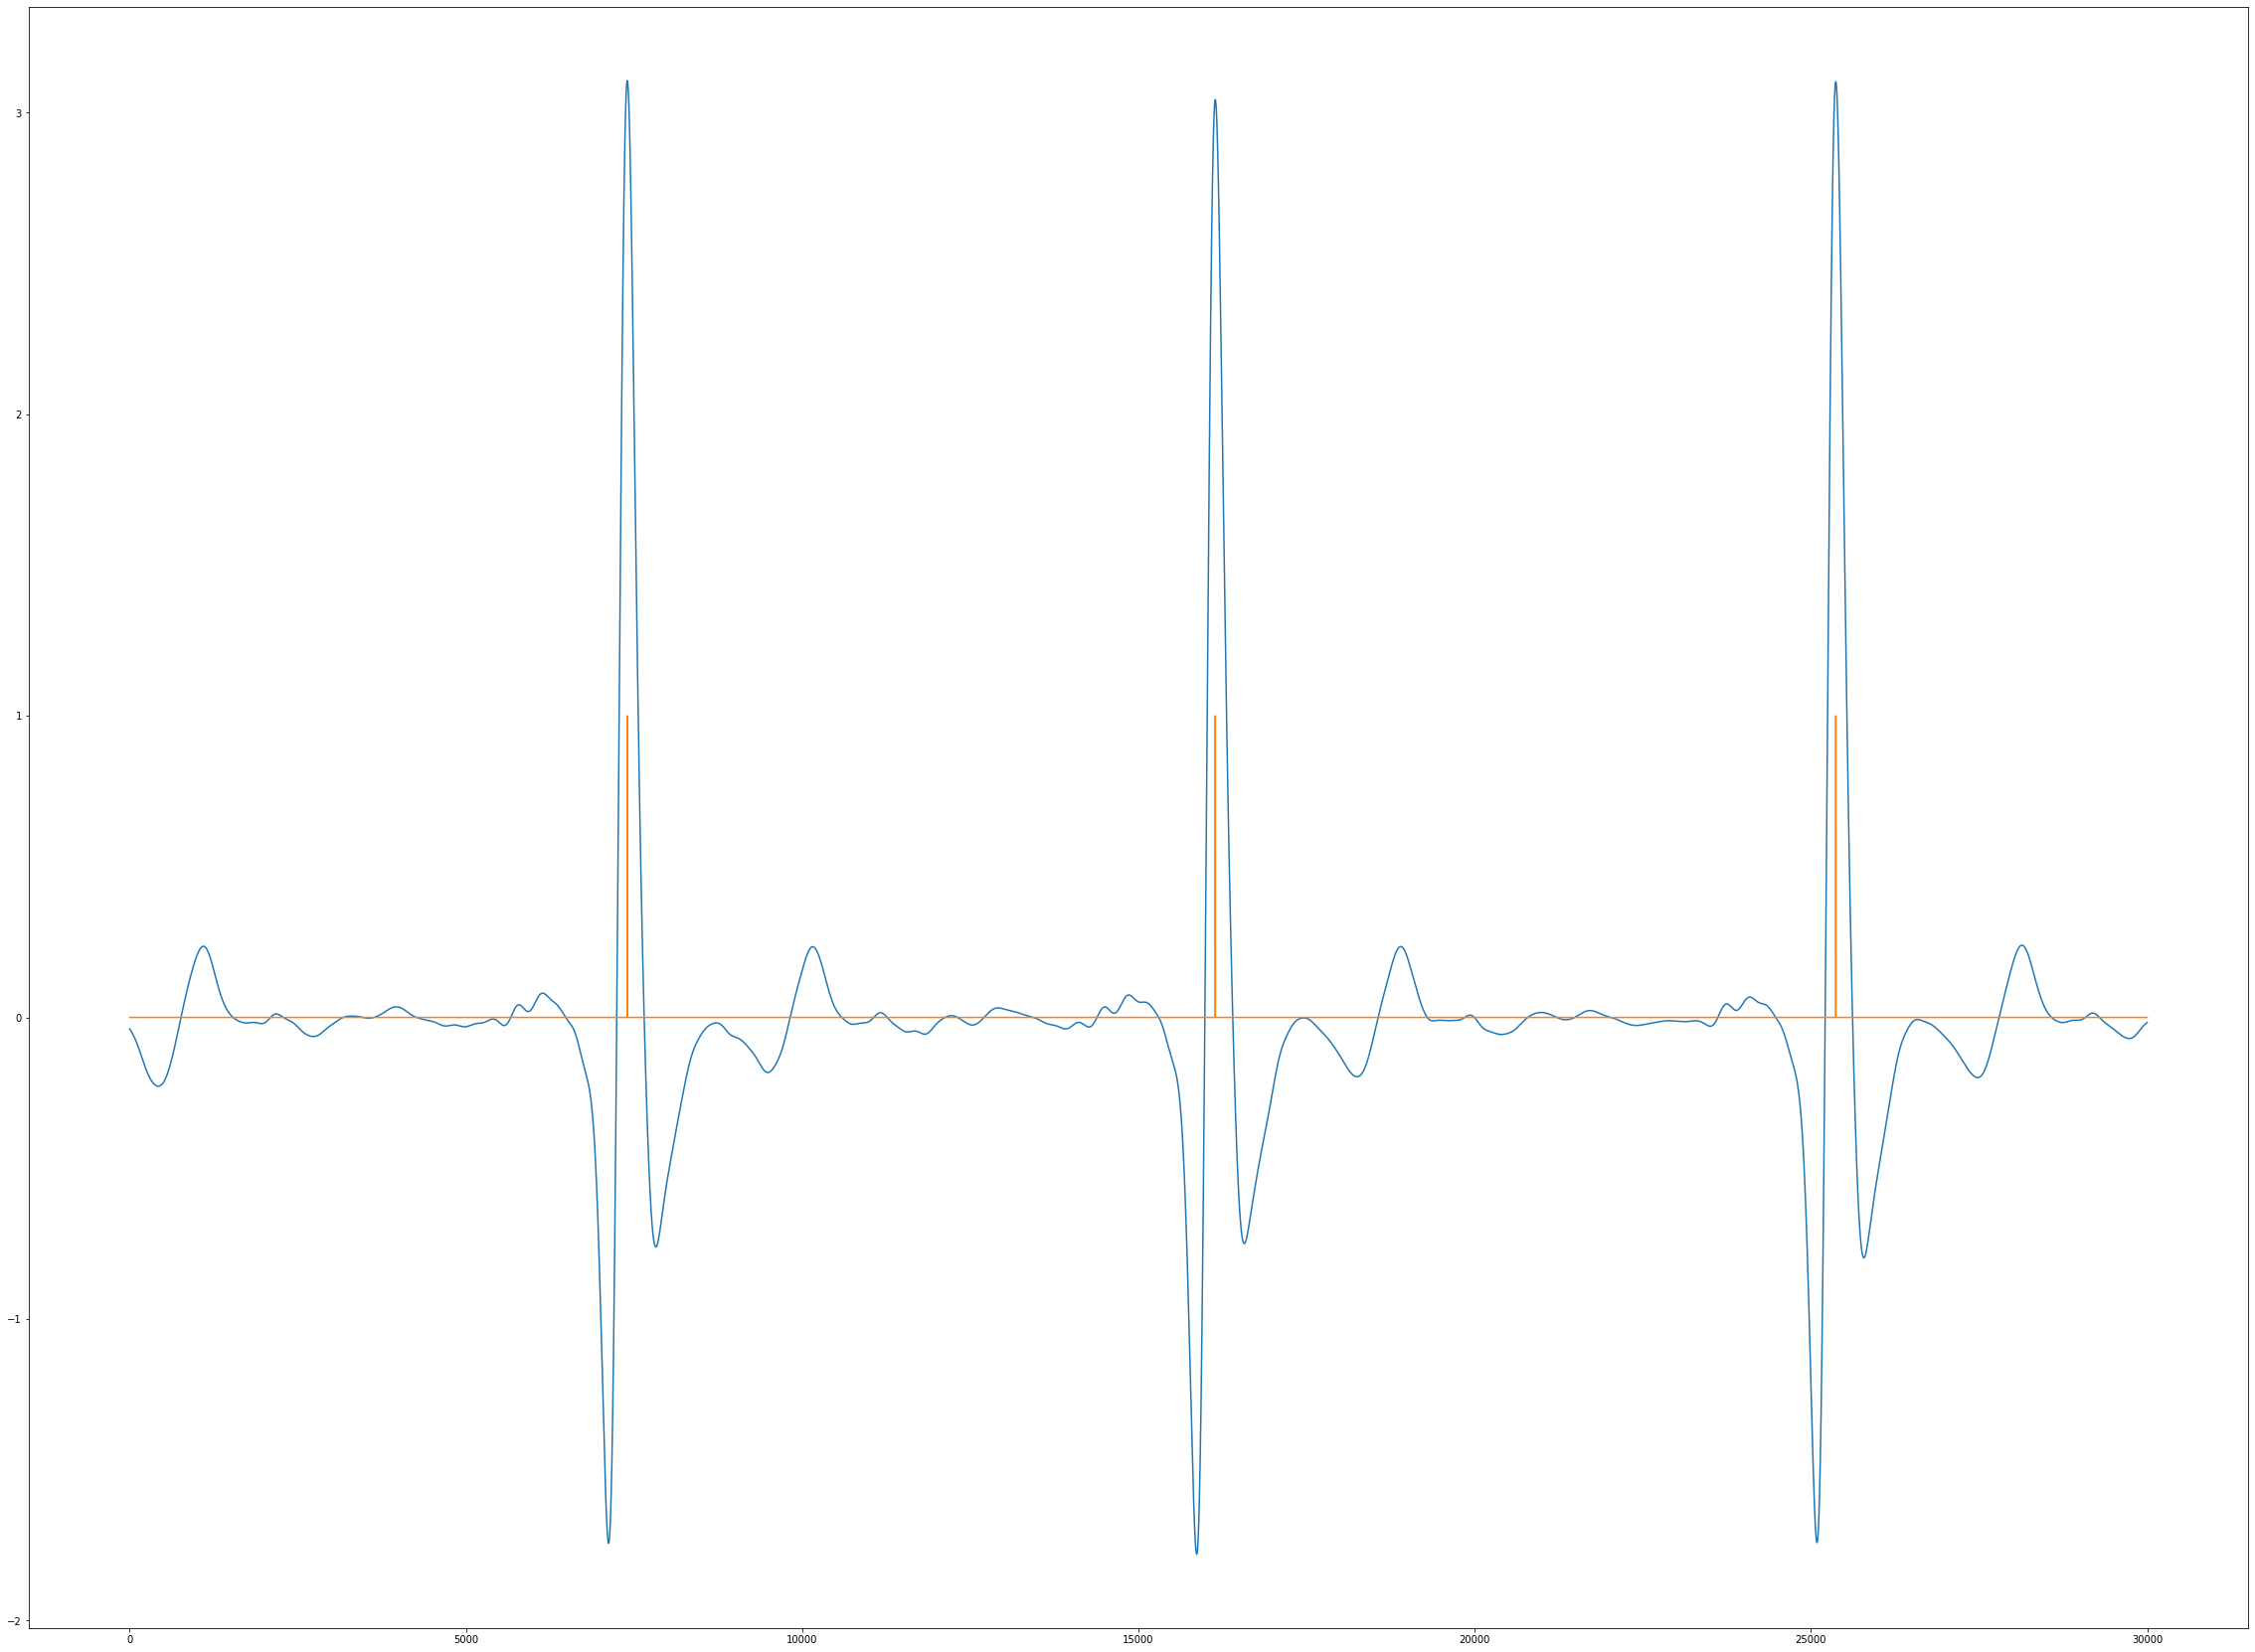

In [91]:
#plt.plot(ecg_raw[:500000])
plt.plot(ecg_filtered[:30000])
plt.plot(r_peaks.fillna(0)[:30000])

In [48]:
cardiac_cycles = preprocessedECG['ECG']['Cardiac_Cycles']

In [50]:
quality_model = nk.bio_ecg.ecg_signal_quality(cardiac_cycles, sampling_rate, quality_model="default")

C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\sangfrois\Documents\Computation\Anaconda3\envs\sangfroisEnv\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.20.2 when using version 0.21.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [59]:
template = np.array(quality_model['Cardiac_Cycles_Signal_Quality'])

In [61]:
np.savetxt('template.txt', template)

In [23]:
dict.keys(preprocessedECG['ECG'])

dict_keys(['R_Peaks', 'Cardiac_Cycles', 'T_Waves', 'P_Waves', 'Q_Waves', 'S_Waves', 'Q_Waves_Onsets', 'T_Waves_Onsets', 'T_Waves_Ends'])

In [69]:
r_peaks = r_peaks.fillna(0)

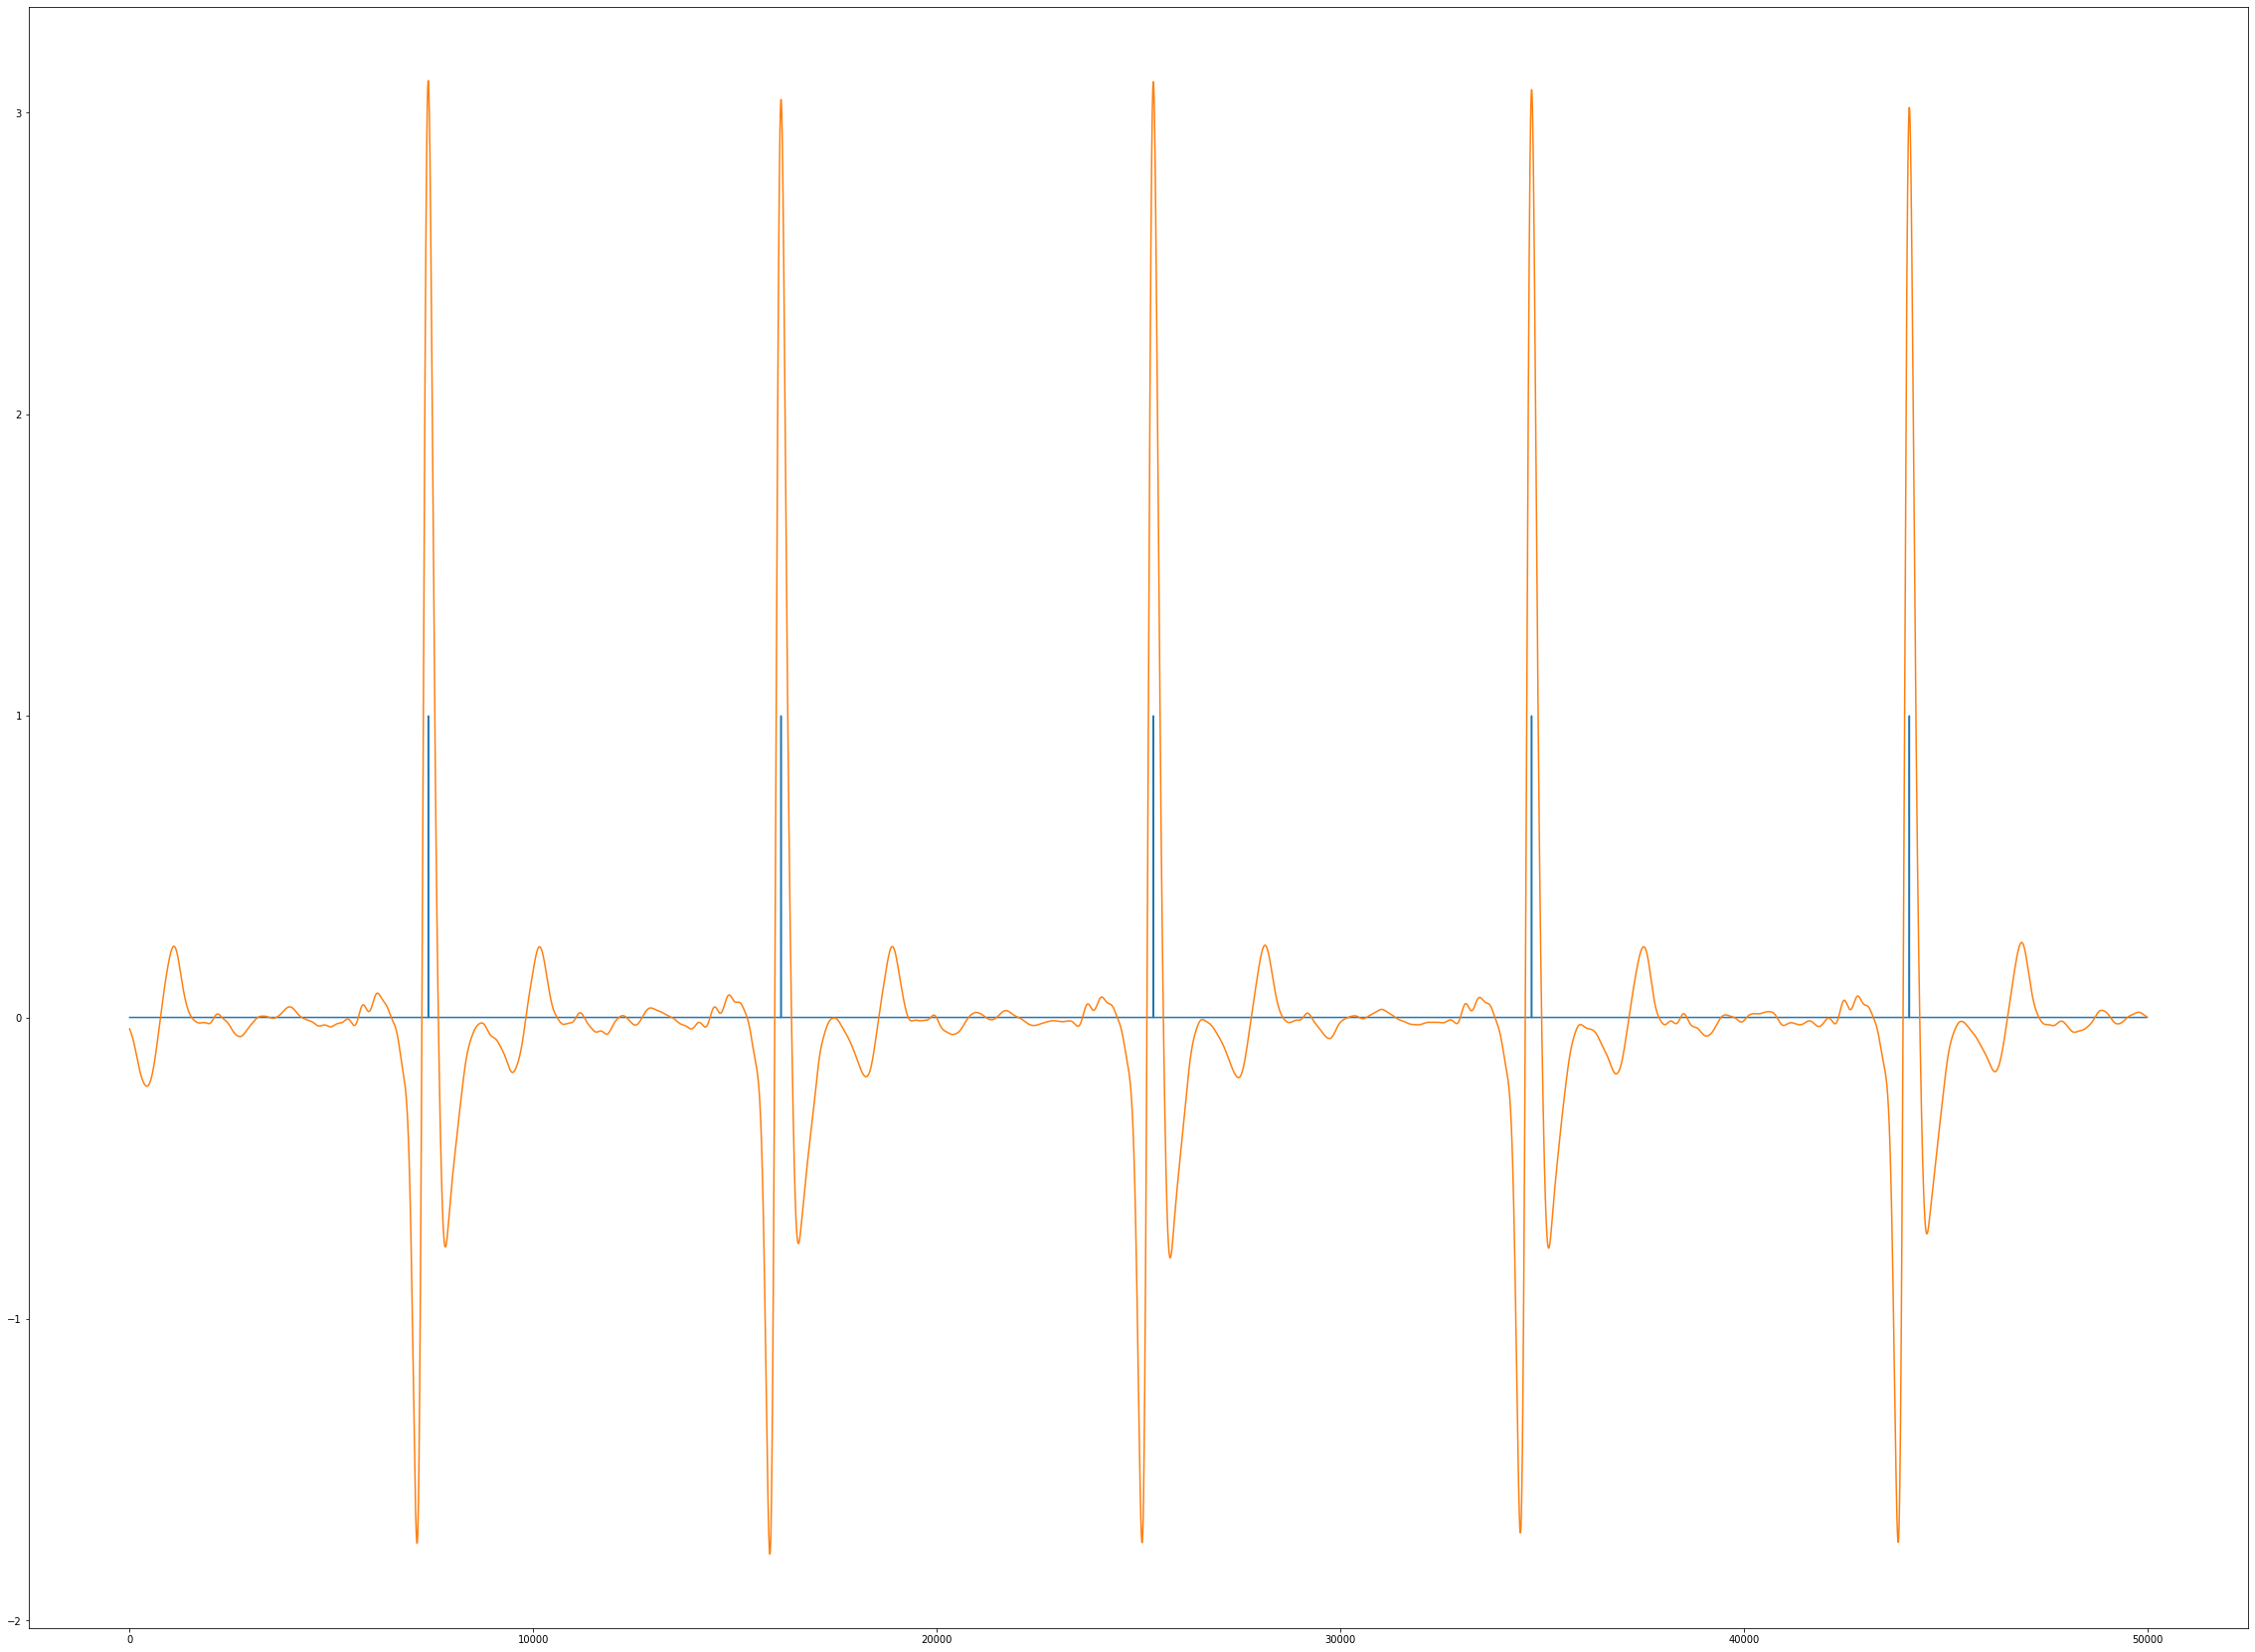

In [93]:
plt.plot(r_peaks.fillna(0)[:50000])
plt.plot(ecg_filtered[:50000])

In [70]:
r_peaks.describe()

count    5.777260e+06
mean     1.107792e-04
std      1.052459e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: ECG_R_Peaks, dtype: float64

In [77]:
R_Peaks = nk.ecg_find_peaks(ecg_filtered, sampling_rate=sampling_rate)

In [89]:
data = np.array(ecg_raw[0:30000])
np.savetxt('data.txt',data)

In [90]:
data

array([-0.89523315, -0.89553833, -0.89508057, ..., -0.16952515,
       -0.16921997, -0.16921997])

In [78]:
hrv_features = nk.bio.ecg_hrv(R_Peaks, sampling_rate=sampling_rate, hrv_features='time')

KeyboardInterrupt: 

In [ ]:
import pickle 